In [62]:
# import tools

import pandas as pd
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [3]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-03-21 04:39:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   106MB/s    in 0.8s    

2022-03-21 04:39:11 (106 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [63]:
# import datasets

df = pd.read_csv('https://raw.githubusercontent.com/GitGears/CYP/CYP_data/CYP281_admet.csv')
df

,smiles,ID,pIC50,class,LogS,LogD,LogP,Pgp_inh,Pgp_sub,HIA,...,MCE_18,NP_likeness,Alarm_NMR,BMS,Chelating,PAINS,Lipinski,Pfizer,GSK,GoldenTriangle
0,CC(C1N=CC=N1)[C@H]1CCC2C3CC=C4CC(=O)CC[C@]4(C)...,CHEMBL112039,4.52,inactive,-4.895,3.951,4.577,0.505,0.193,0.008,...,78.233,2.436,0,0,0,0,Accepted,Rejected,Rejected,Accepted
1,C[C@]12CCC3C(CC=C4CC(O)CC[C@@]43C)C1CCC2c1ccon1,CHEMBL113205,5.95,inactive,-5.396,3.883,4.362,0.007,0.002,0.004,...,105.538,2.002,0,0,0,0,Accepted,Rejected,Rejected,Accepted
2,C[C@]12CCC3C(CC=C4CC(=O)CC[C@@]43C)C1CC[C@@H]2...,CHEMBL113407,6.40,intermediate,-4.524,3.455,3.963,0.749,0.698,0.009,...,77.538,2.174,0,0,0,0,Accepted,Rejected,Accepted,Accepted
3,C[C@]12CCC3C(CC=C4CC(=O)CC[C@@]43C)C1CC=C2c1cc...,CHEMBL113448,7.23,active,-4.539,3.815,4.140,0.994,0.001,0.005,...,102.667,1.642,0,0,0,0,Accepted,Rejected,Rejected,Accepted
4,C[C@]12CCC3C(CC=C4CC(O)CC[C@@]43C)C1CCC2c1ccno1,CHEMBL113804,6.82,intermediate,-5.073,3.595,4.059,0.117,0.002,0.005,...,105.538,1.991,0,0,0,0,Accepted,Rejected,Rejected,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,CC(CCC(=O)OC1CC2CC=CC1C2)[C@H]1CCC2C3CC=C4C[C@...,CHEMBL80216,6.21,intermediate,-6.916,5.360,6.357,0.357,0.000,0.039,...,90.316,2.356,0,0,0,0,Accepted,Rejected,Rejected,Rejected
277,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC=C2...,CHEMBL80388,5.85,inactive,-4.838,3.266,3.699,0.324,0.027,0.017,...,104.800,1.509,0,0,0,0,Accepted,Rejected,Accepted,Accepted
278,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC[C@...,CHEMBL82926,7.64,active,-4.517,3.790,4.700,0.141,0.156,0.004,...,104.488,2.077,0,0,0,0,Accepted,Rejected,Rejected,Accepted
279,C[C@]12CCC3C(CC[C@H]4CC(=O)CC[C@]34C)C1CC=C2c1...,CHEMBL84230,8.52,potent,-2.363,3.885,4.648,0.992,0.006,0.004,...,103.600,1.849,0,0,0,0,Accepted,Rejected,Rejected,Accepted


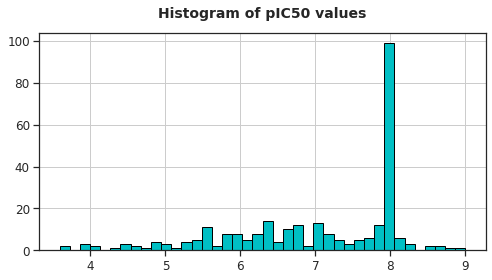

In [64]:
df.pIC50.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of pIC50 values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

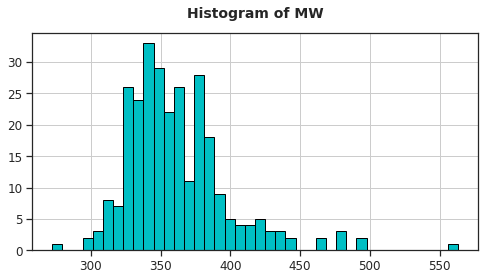

In [6]:
df.MW.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of MW', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

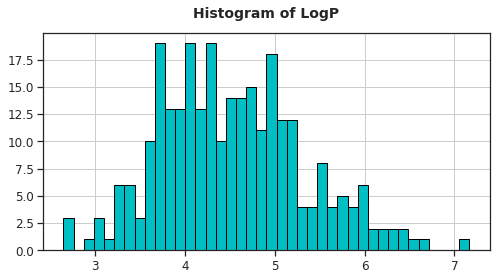

In [7]:
df.LogP.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of LogP', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

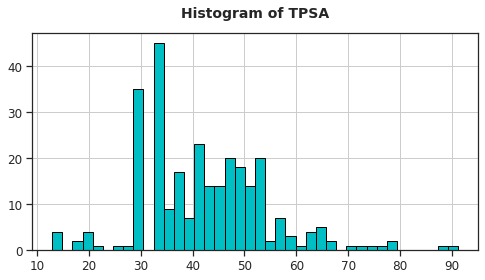

In [8]:
df.TPSA.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of TPSA', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

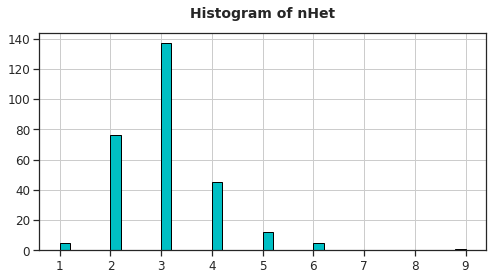

In [9]:
df.nHet.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nHet', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

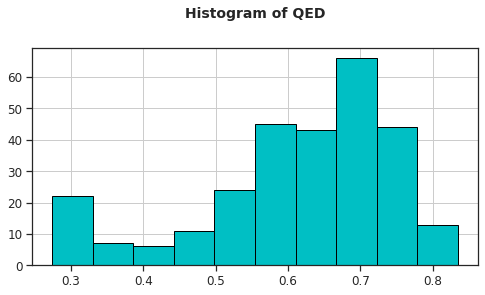

In [10]:
df.QED.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of QED', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

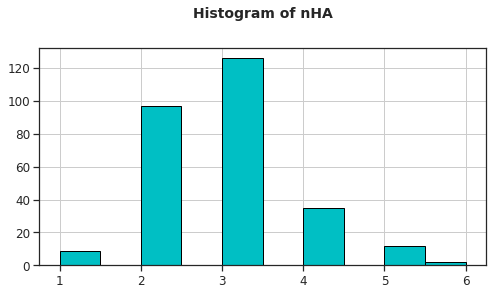

In [11]:
df.nHA.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nHA', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

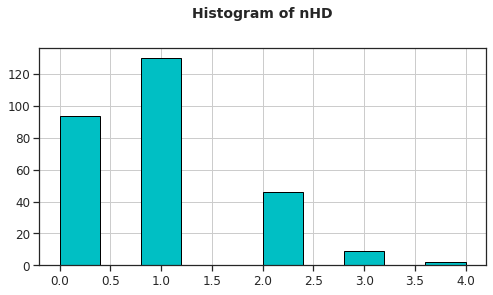

In [12]:
df.nHD.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nHD', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

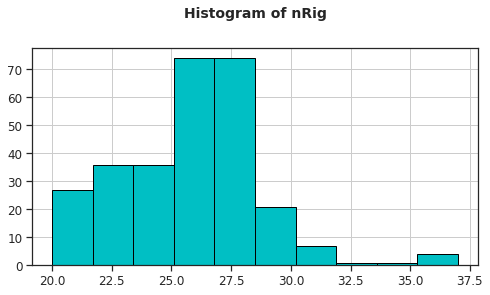

In [13]:
df.nRig.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nRig', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

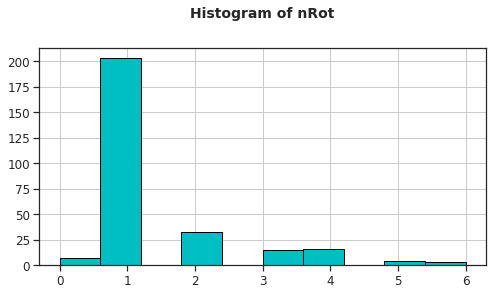

In [14]:
df.nRot.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nRot', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

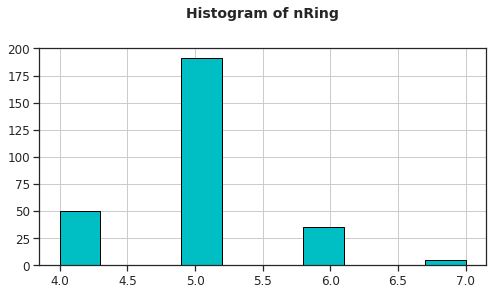

In [15]:
df.nRing.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nRing', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

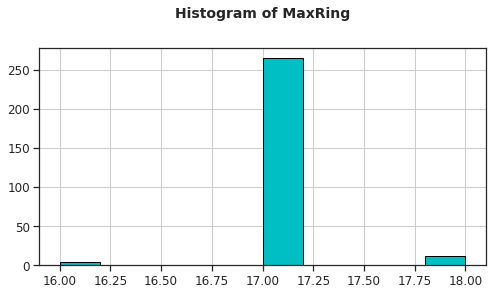

In [16]:
df.MaxRing.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of MaxRing', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

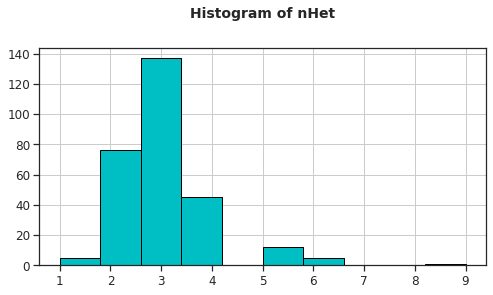

In [17]:
df.nHet.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of nHet', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

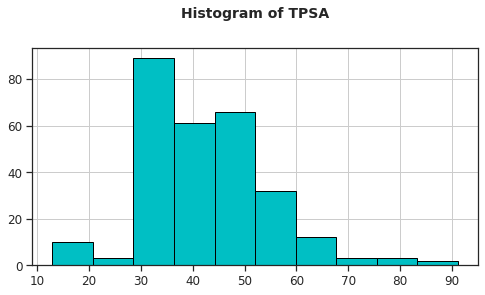

In [18]:
df.TPSA.hist(bins=10, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of TPSA', fontsize=14, fontweight='black', pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

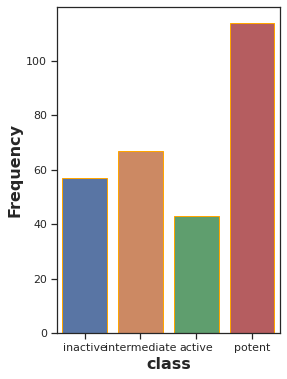

In [19]:
plt.figure(figsize=(4, 6))

sns.countplot(x='class', data=df, edgecolor='orange', order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('class.pdf')

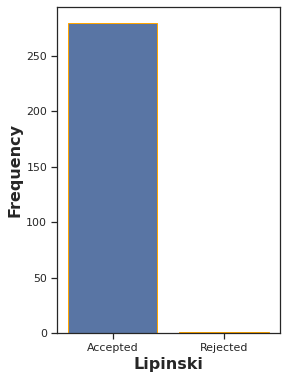

In [20]:
plt.figure(figsize=(4, 6))

sns.countplot(x='Lipinski', data=df, edgecolor='orange')

plt.xlabel('Lipinski', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('Lipinski.pdf')

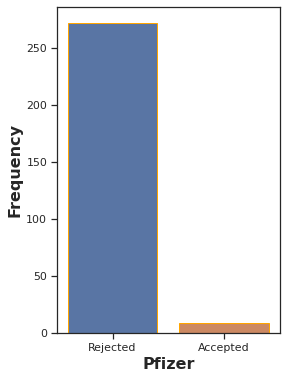

In [21]:
plt.figure(figsize=(4, 6))

sns.countplot(x='Pfizer', data=df, edgecolor='orange')

plt.xlabel('Pfizer', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('Pfizer.pdf')

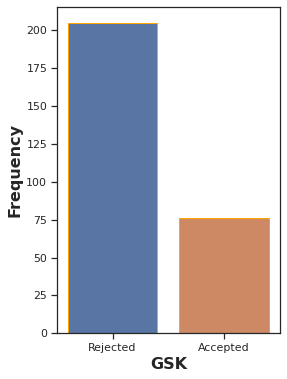

In [22]:
plt.figure(figsize=(4, 6))

sns.countplot(x='GSK', data=df, edgecolor='orange')

plt.xlabel('GSK', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('GSK.pdf')

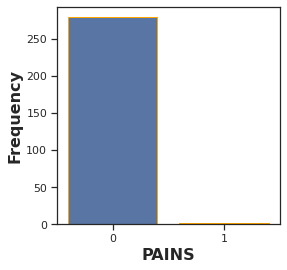

In [23]:
plt.figure(figsize=(4, 4))

sns.countplot(x='PAINS', data=df, edgecolor='orange')

plt.xlabel('PAINS', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('PAINS.pdf')

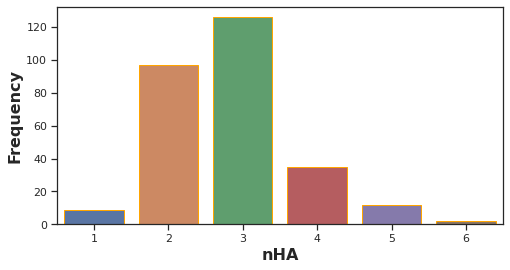

In [24]:
plt.figure(figsize=(8, 4))

sns.countplot(x='nHA', data=df, edgecolor='orange')

plt.xlabel('nHA', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('nHA.pdf')

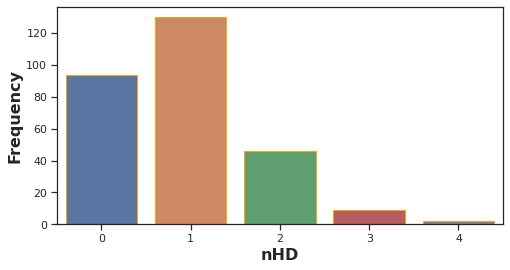

In [25]:
plt.figure(figsize=(8, 4))

sns.countplot(x='nHD', data=df, edgecolor='orange')

plt.xlabel('nHD', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('nHD.pdf')

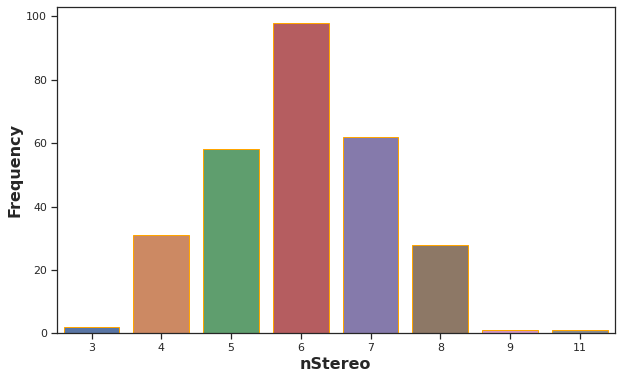

In [26]:
plt.figure(figsize=(10, 6))

sns.countplot(x='nStereo', data=df, edgecolor='orange')

plt.xlabel('nStereo', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('nStereo.pdf')

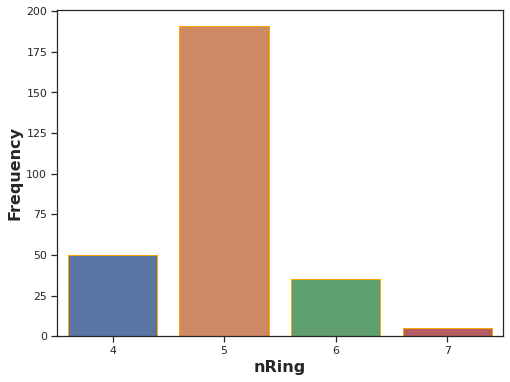

In [27]:
plt.figure(figsize=(8, 6))

sns.countplot(x='nRing', data=df, edgecolor='orange')

plt.xlabel('nRing', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('nRing.pdf')

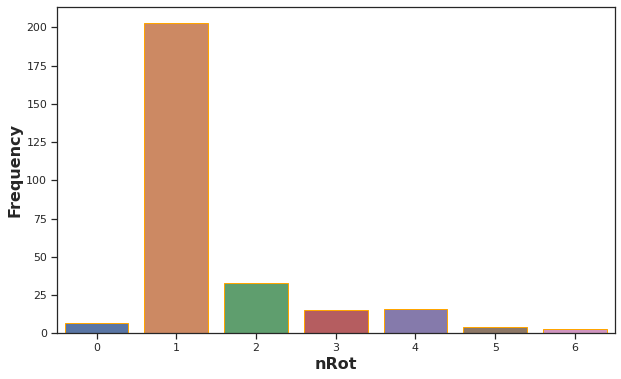

In [28]:
plt.figure(figsize=(10, 6))

sns.countplot(x='nRot', data=df, edgecolor='orange')

plt.xlabel('nRot', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('nRot.pdf')

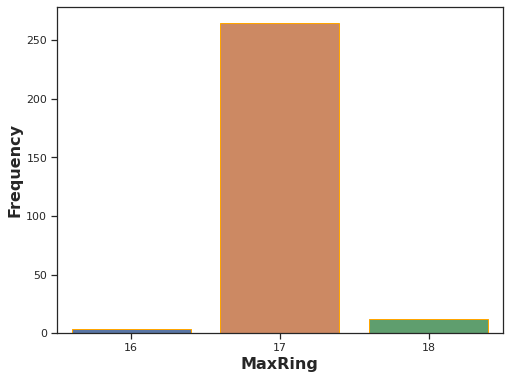

In [29]:
plt.figure(figsize=(8, 6))

sns.countplot(x='MaxRing', data=df, edgecolor='orange')

plt.xlabel('MaxRing', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('MaxRing.pdf')

In [30]:
! pip install squarify
import squarify

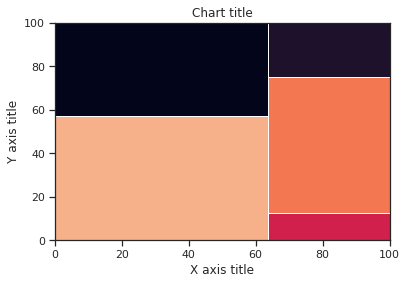

In [31]:
sizes = [40, 30, 5, 25, 10]
squarify.plot(sizes)
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

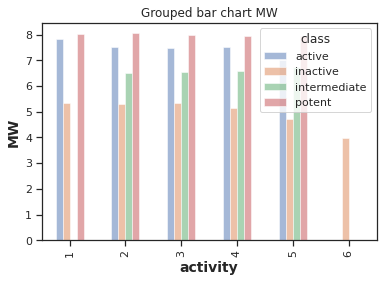

<Figure size 432x288 with 0 Axes>

In [32]:
#Creating the dataset
import numpy as np
plt.figure(figsize=(15, 12))

df_pivot = pd.pivot_table (df, values="pIC50",index="nHA",columns="class", aggfunc=np.mean)
plt.figure(figsize=(15, 12))

#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

#Adding the aesthetics
plt.title('Grouped bar chart MW')
plt.xlabel('activity',fontsize=14, fontweight='bold')
plt.ylabel('MW',fontsize=14, fontweight='bold') 

# Show the plot
plt.show()
plt.savefig('Grouped bar chart MW.pdf')


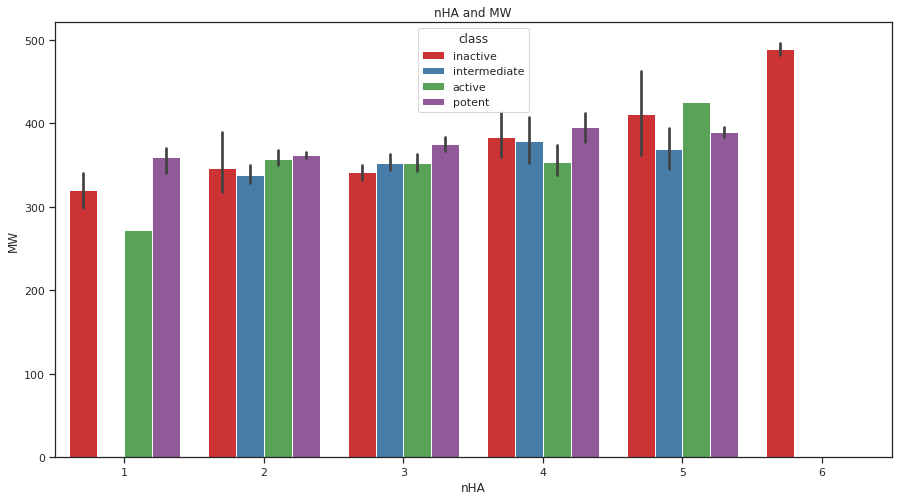

In [33]:
plt.figure(figsize=(15, 8))

#Creating the bar plot grouped across classes
ax = sns.barplot(x = 'nHA',y = 'MW',hue = 'class',data = df, palette = "Set1")

#Adding the aesthetics
plt.title('nHA and MW')
plt.xlabel('nHA')
plt.ylabel('MW') 

# Show the plot
plt.show()

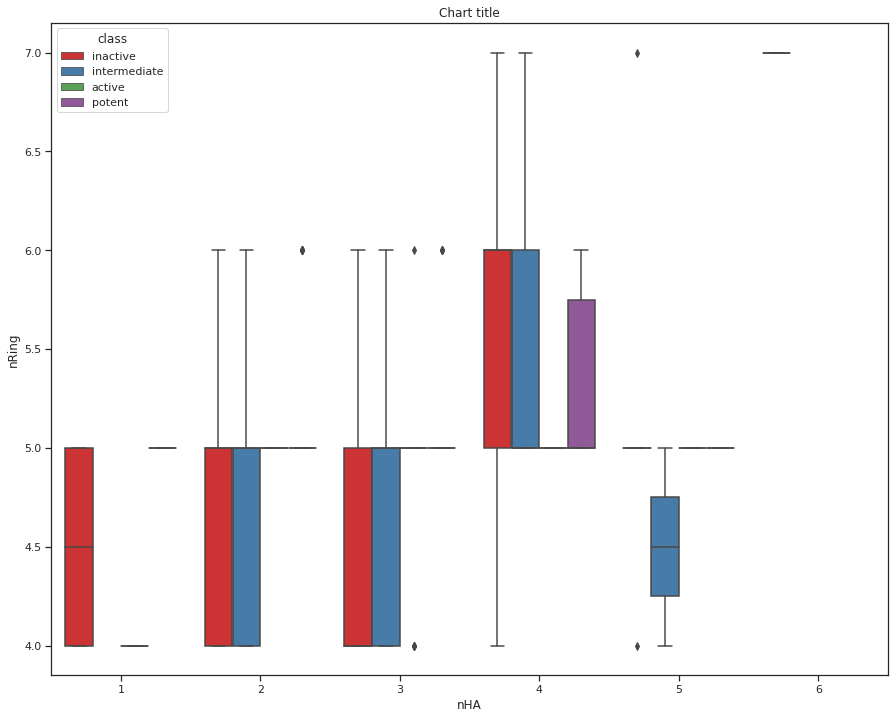

In [34]:
plt.figure(figsize=(15, 12))

ax = sns.boxplot(x="nHA", y="nRing", hue="class", data=df, palette="Set1")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('nHA')
plt.ylabel('nRing') 

# Show the plot
plt.show()

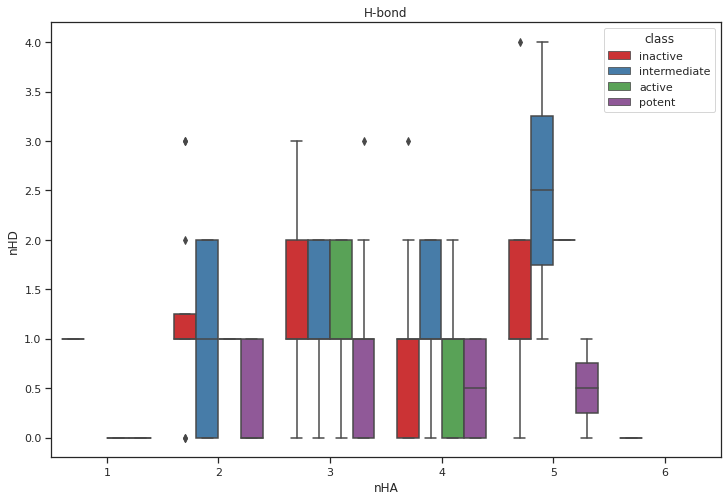

In [35]:
plt.figure(figsize=(12, 8))

#Creating boxplots
ax = sns.boxplot(x="nHA", y="nHD", hue="class", data=df, palette="Set1")

#Adding the aesthetics
plt.title('H-bond')
plt.xlabel('nHA')
plt.ylabel('nHD') 
# Show the plot
plt.show()

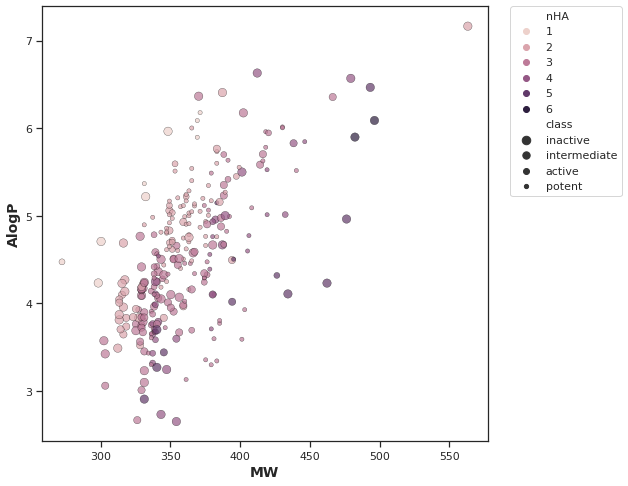

In [36]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x='MW', y='LogP', data=df, hue='nHA', size='class', edgecolor='black', alpha=0.7)


plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('AlogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

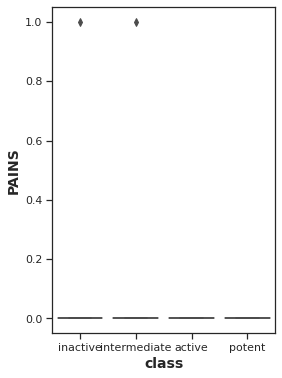

In [37]:
import numpy as np

plt.figure(figsize=(4, 6))

sns.boxplot(x = 'class', y = 'PAINS', data = df)

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('PAINS', fontsize=14, fontweight='bold')

plt.savefig('plot_PAINS.pdf')

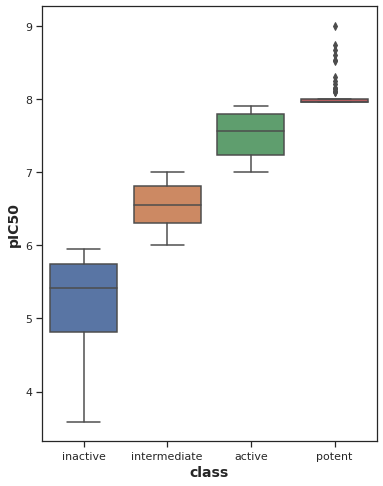

In [38]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'pIC50', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_activity.pdf')

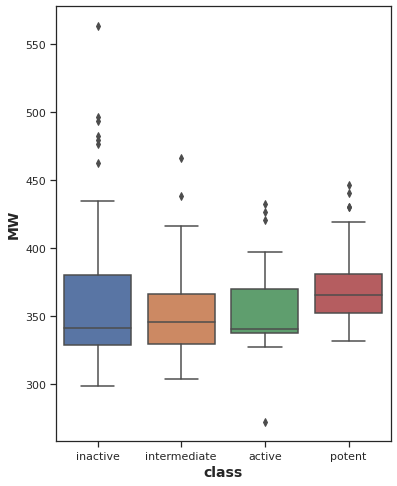

In [39]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'MW', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.jpg')

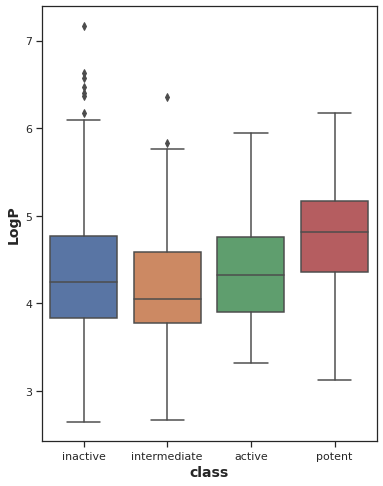

In [40]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'LogP', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_alogp.jpg')

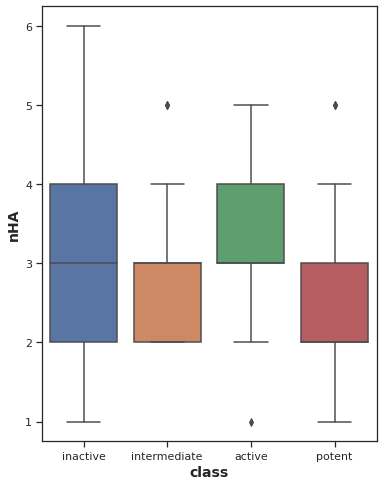

In [41]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nHA', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nHA', fontsize=14, fontweight='bold')

plt.savefig('plot_nHA.jpg')

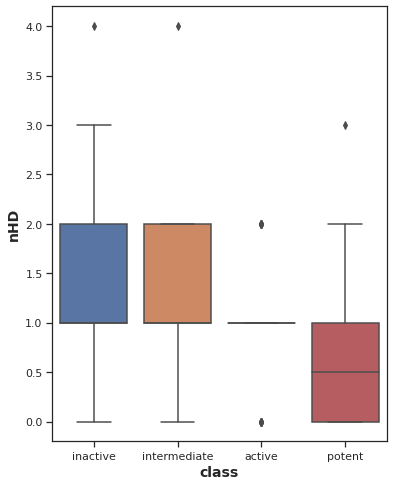

In [42]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nHD', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nHD', fontsize=14, fontweight='bold')

plt.savefig('plot_nHD.jpg')

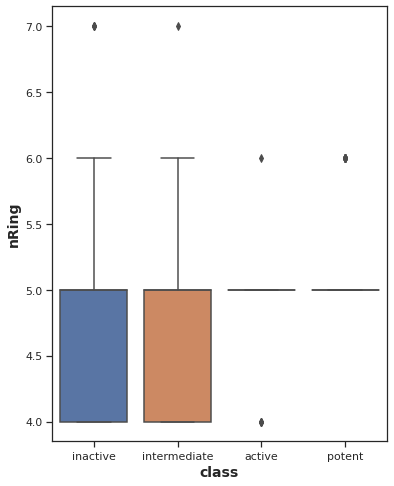

In [43]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nRing', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nRing', fontsize=14, fontweight='bold')

plt.savefig('plot_nRing.jpg')

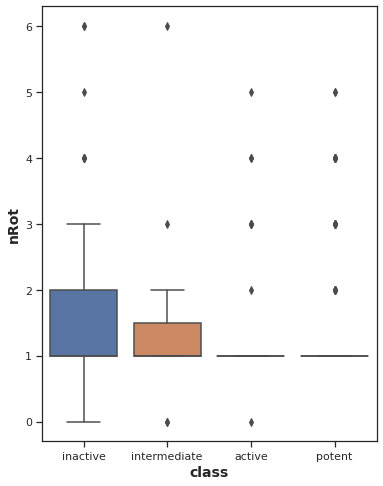

In [44]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nRot', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nRot', fontsize=14, fontweight='bold')

plt.savefig('plot_nRot.jpg')

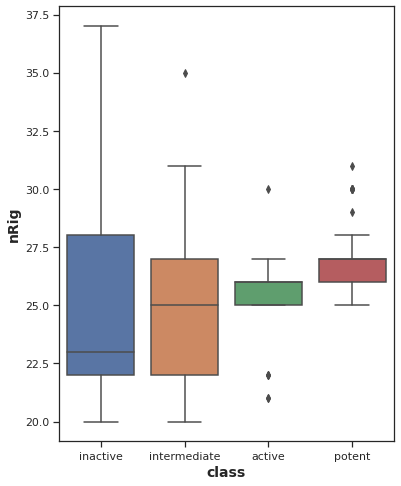

In [45]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nRig', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nRig', fontsize=14, fontweight='bold')

plt.savefig('plot_nRig.jpg')

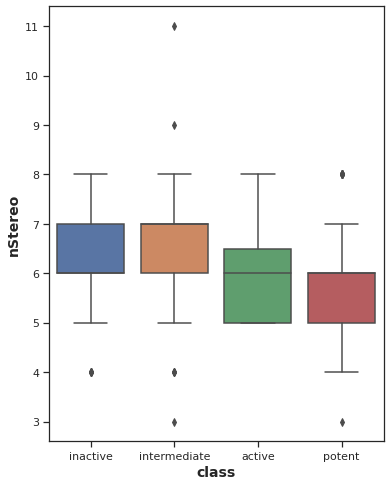

In [46]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nStereo', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nStereo', fontsize=14, fontweight='bold')

plt.savefig('plot_nStereo.jpg')

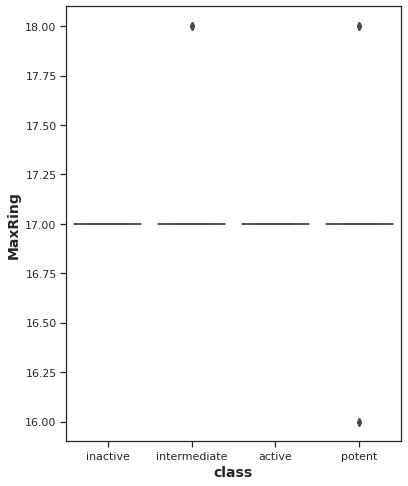

In [47]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'MaxRing', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('MaxRing', fontsize=14, fontweight='bold')

plt.savefig('plot_MaxRing.jpg')

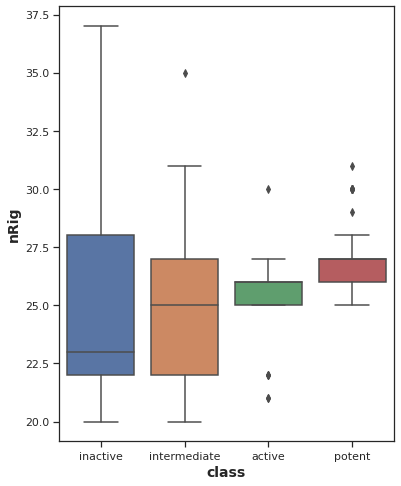

In [48]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nRig', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nRig', fontsize=14, fontweight='bold')

plt.savefig('plot_nRig.jpg')

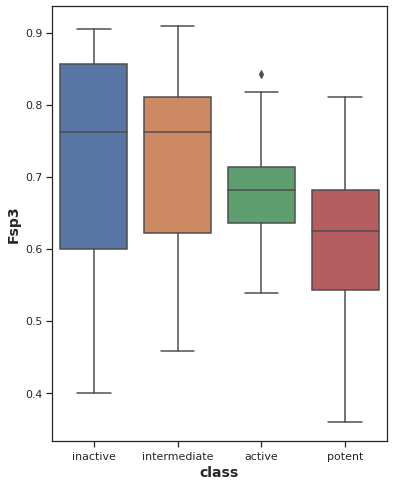

In [49]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'Fsp3', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('Fsp3', fontsize=14, fontweight='bold')

plt.savefig('plot_Fsp3.jpg')

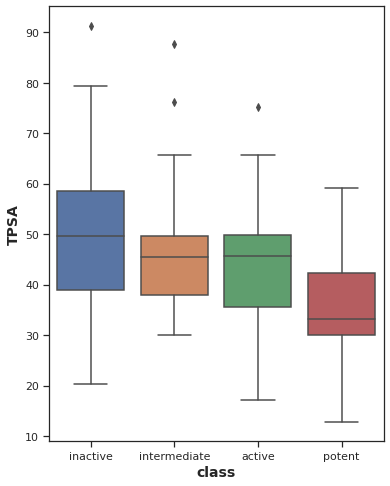

In [50]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'TPSA', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('TPSA', fontsize=14, fontweight='bold')

plt.savefig('plot_tpsa.jpg')

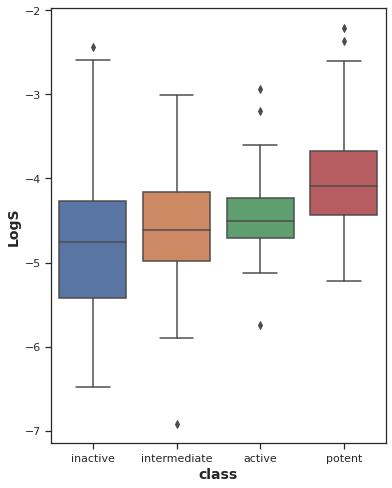

In [51]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'LogS', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('LogS', fontsize=14, fontweight='bold')

plt.savefig('plot_LogS.jpg')

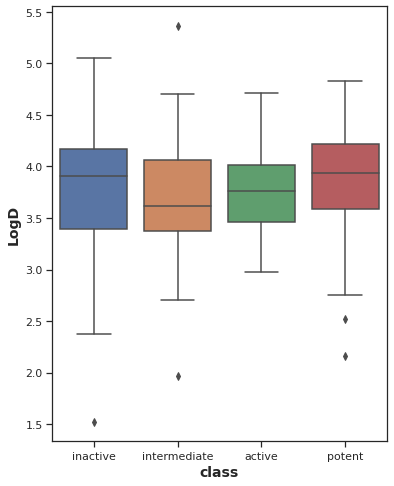

In [52]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'LogD', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('LogD', fontsize=14, fontweight='bold')

plt.savefig('plot_LogD.jpg')

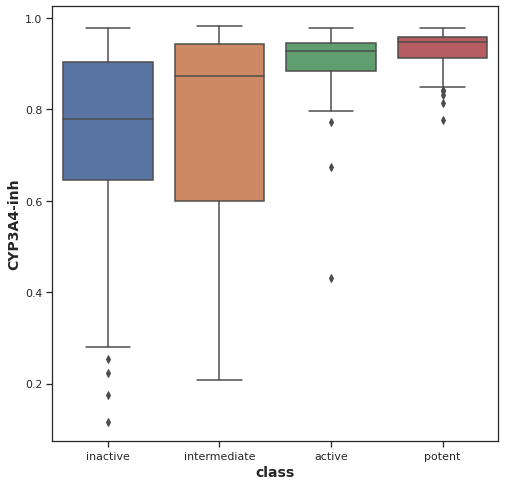

In [53]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'CYP3A4-inh', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('CYP3A4-inh', fontsize=14, fontweight='bold')

plt.savefig('plot_CYP3A4-inh.jpg')

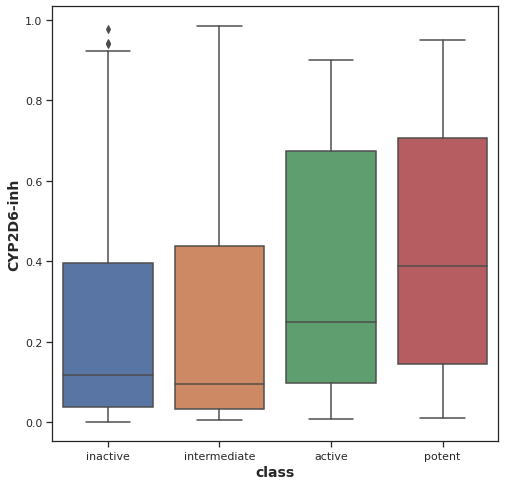

In [54]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'CYP2D6-inh', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('CYP2D6-inh', fontsize=14, fontweight='bold')

plt.savefig('plot_CYP2D6-inh.jpg')

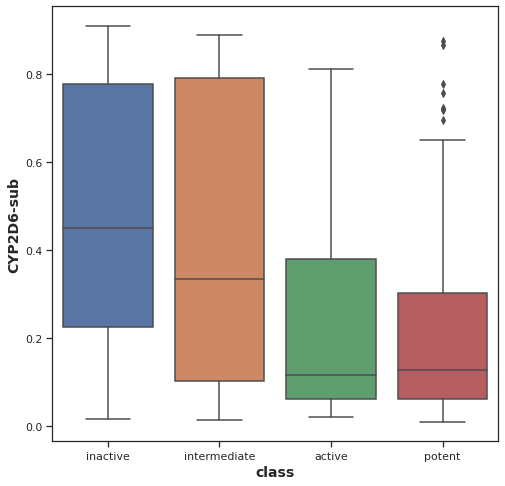

In [55]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'CYP2D6-sub', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('CYP2D6-sub', fontsize=14, fontweight='bold')

plt.savefig('plot_CYP2D6-sub.jpg')

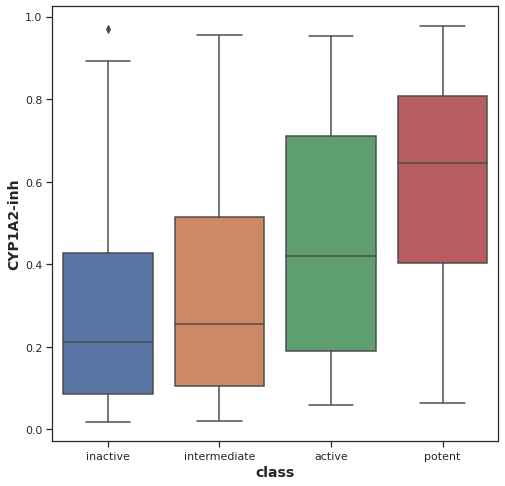

In [56]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'class', y = 'CYP1A2-inh', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('CYP1A2-inh', fontsize=14, fontweight='bold')

plt.savefig('plot_CYP1A2-inh.jpg')

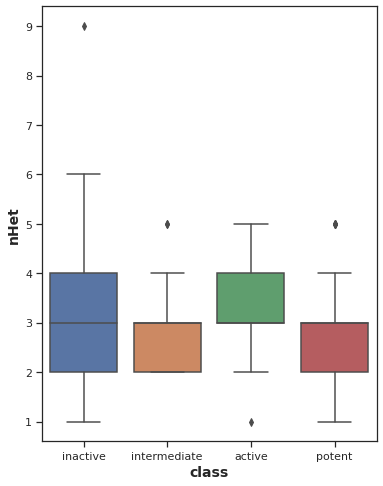

In [57]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'nHet', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('nHet', fontsize=14, fontweight='bold')

plt.savefig('plot_nHet.jpg')

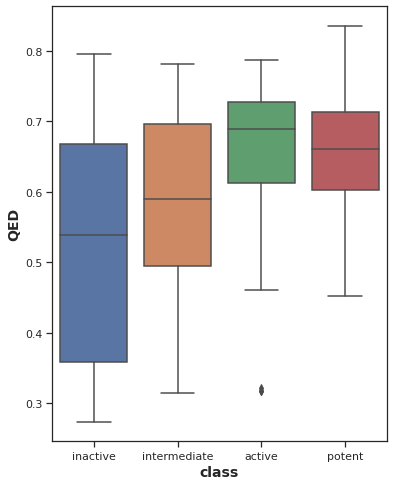

In [58]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'QED', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('QED', fontsize=14, fontweight='bold')

plt.savefig('plot_QED.jpg')

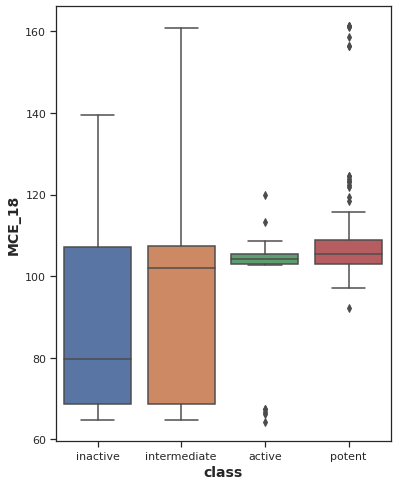

In [59]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'MCE_18', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('MCE_18', fontsize=14, fontweight='bold')

plt.savefig('plot_MCE_18.jpg')

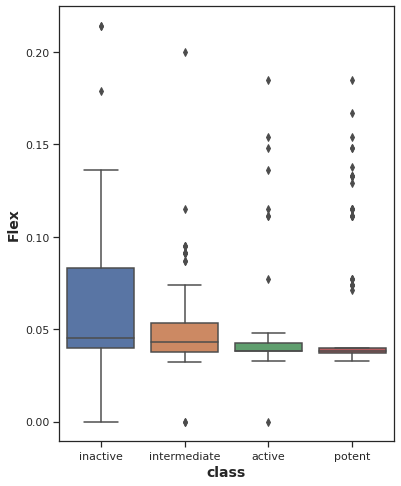

In [60]:
plt.figure(figsize=(6, 8))

sns.boxplot(x = 'class', y = 'Flex', data = df, order=['inactive','intermediate','active','potent'])

plt.xlabel('class', fontsize=14, fontweight='bold')
plt.ylabel('Flex', fontsize=14, fontweight='bold')

plt.savefig('plot_Flex.jpg')